In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load dataset SVHN
dataset_name = "svhn_cropped"
dataset, info = tfds.load(dataset_name, as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.U7CUHV_3.1.0/svhn_cropped-train.tfrecord*...:   0%…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.U7CUHV_3.1.0/svhn_cropped-test.tfrecord*...:   0%|…

Generating extra examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.U7CUHV_3.1.0/svhn_cropped-extra.tfrecord*...:   0%…

Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.1.0. Subsequent calls will reuse this data.


In [3]:
# Preprocessing data
def preprocess(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)  # Normalisasi ke [0,1]
    return image, label

In [4]:
# Pisahkan dataset train dan test
train_data = dataset['train'].map(preprocess).batch(128).shuffle(1000)
test_data = dataset['test'].map(preprocess).batch(128)

In [5]:
# Membangun model CNN
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 kelas angka (0-9)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile model
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [7]:
# Training model
history_cnn = model_cnn.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 102s 156ms/step - accuracy: 0.4513 - loss: 1.6173 - val_accuracy: 0.8205 - val_loss: 0.6779
Epoch 2/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 107s 169ms/step - accuracy: 0.8240 - loss: 0.6018 - val_accuracy: 0.8512 - val_loss: 0.5361
Epoch 3/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 97s 149ms/step - accuracy: 0.8497 - loss: 0.5066 - val_accuracy: 0.8625 - val_loss: 0.4810
Epoch 4/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 152s 166ms/step - accuracy: 0.8651 - loss: 0.4539 - val_accuracy: 0.8723 - val_loss: 0.4549
Epoch 5/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 131s 148ms/step - accuracy: 0.8744 - loss: 0.4200 - val_accuracy: 0.8792 - val_loss: 0.4284
Epoch 6/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 97s 151ms/step - accuracy: 0.8830 - loss: 0.3905 - val_accuracy: 0.8777 - val_loss: 0.4313
Epoch 7/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 96s 149ms/step - accuracy: 0.8913 - loss: 0.3676 - val_accuracy: 0.8828 - val_loss: 0.4198
Epoch 8/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 151s 167ms/step - accuracy: 0.8959 - lo

In [8]:
# Evaluasi model
y_true, y_pred = [], []
for images, labels in test_data:
    predictions = np.argmax(model_cnn.predict(images), axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━

In [9]:
# Hitung metrik evaluasi
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

In [10]:
# Print hasil evaluasi
print(f'CNN Test Accuracy: {accuracy:.4f}')
print(f'CNN Precision: {precision:.4f}')
print(f'CNN Recall: {recall:.4f}')
print(f'CNN F1 Score: {f1:.4f}')

CNN Test Accuracy: 0.8922
CNN Precision: 0.8863
CNN Recall: 0.8792
CNN F1 Score: 0.8822


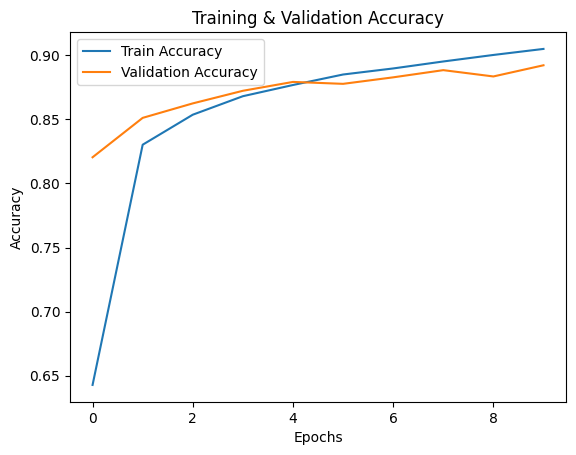

In [11]:
# Plot Akurasi
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.show()